# K-Means Clustering Algorith implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2,random_state=23)

In [3]:
X.shape

(1000, 2)

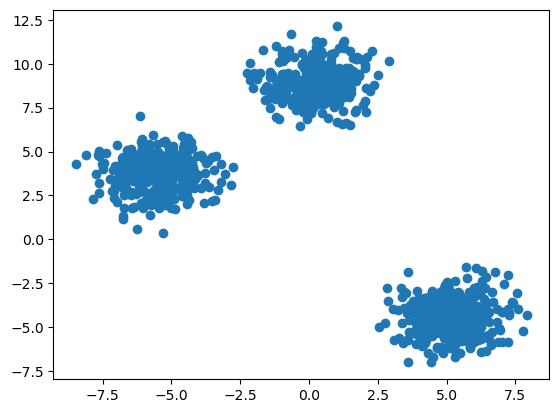

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
#Manual Method
##elbow method to select the K value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

In [10]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 992.0708509383511,
 854.9305498149217,
 758.0834634512628,
 663.3557162485182,
 579.4153849508174,
 532.7077208595967]

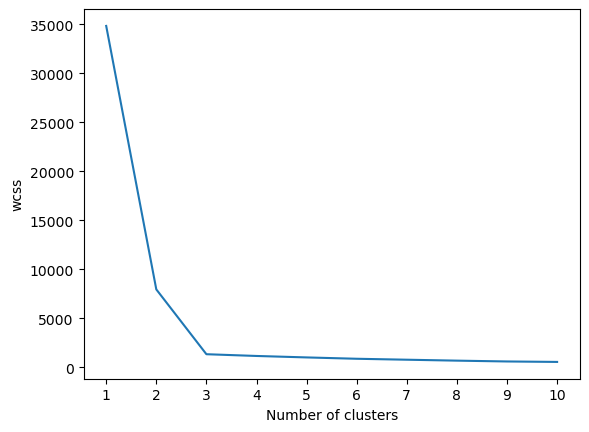

In [11]:
#we are plotting elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, init = "k-means++")

In [15]:
y_labels = kmeans.fit_predict(X_train) 
#fit_predict only for training data

C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
y_test_label = kmeans.predict(X_test)

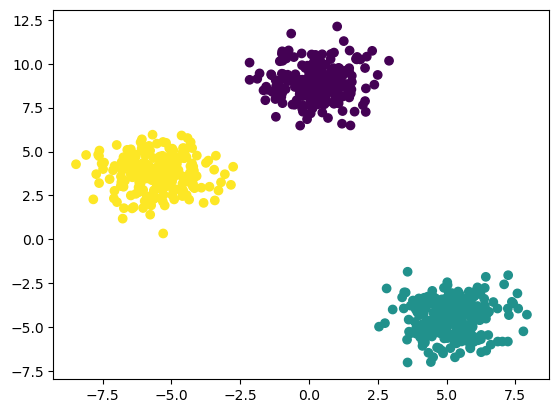

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_labels)

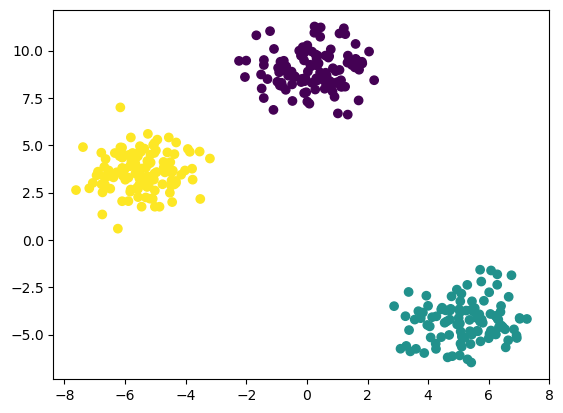

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c = y_test_label)

In [ ]:
#when we have huge data we use automated technique
#we use knee locator

In [20]:
#knee locator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [24]:
kl= KneeLocator(range(1,11), wcss,curve = "convex",direction = "decreasing")
kl.elbow
#convex = when value decrease means in parabolic form
#curve = conex or concave
#direction = increasing or decreasing

3

In [25]:
#performance metrics
#silhouette score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

In [27]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33248162092776595,
 0.34729847490834725,
 0.3384957834126559,
 0.34438119591889765,
 0.34256414842349187]

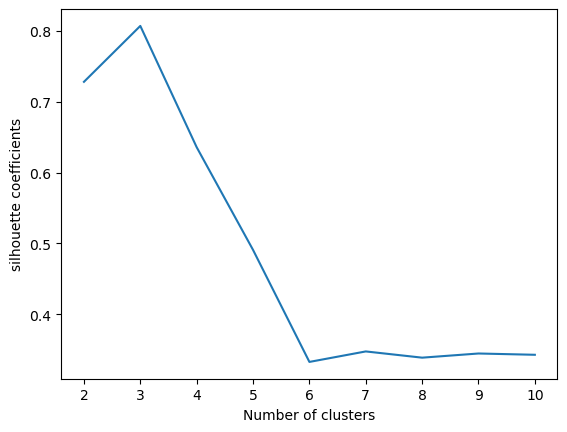

In [28]:
#plotting silhoutte score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette coefficients")
plt.show()

# Hierarchical Clustering Implementation

In [29]:
from sklearn import datasets

In [30]:
iris = datasets.load_iris()

In [31]:
iris_data = pd.DataFrame(iris.data)

In [32]:
iris_data.columns = iris.feature_names

In [33]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(iris_data)

In [36]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [37]:
X_scaled.shape

(150, 4)

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [40]:
pca_scaled = pca.fit_transform(X_scaled)

In [42]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

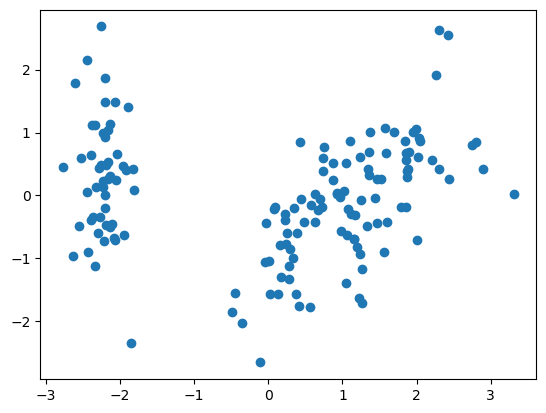

In [41]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

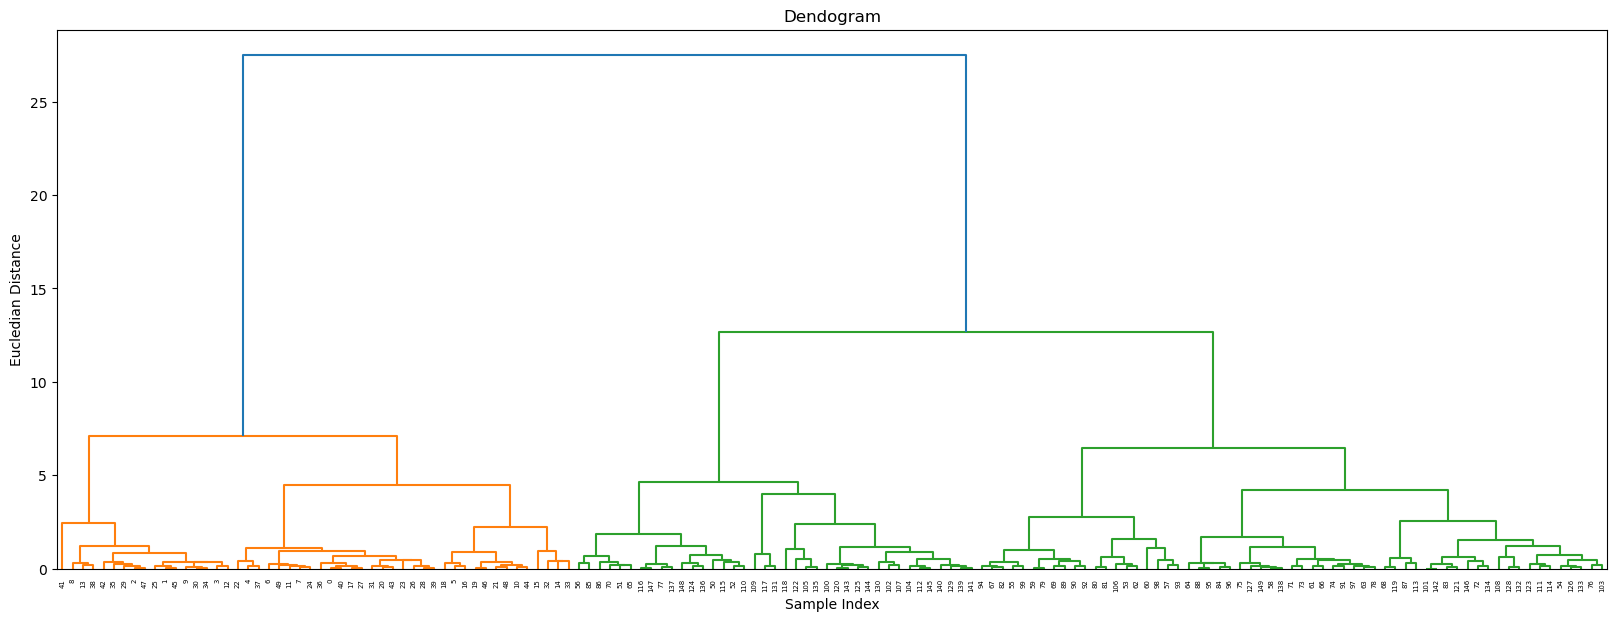

In [43]:
##Agglomerative Clustering
## to construct a Dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize = (20,7))
plt.title("Dendograms")

##create dendograms
sc.dendrogram(sc.linkage(pca_scaled, method="ward"))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage = "ward")
cluster.fit(pca_scaled)

C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [45]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

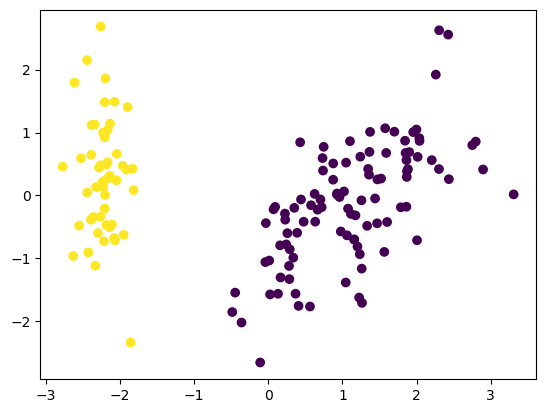

In [46]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c= cluster.labels_)

In [47]:
silhouette_coefficients1 = []
#we start at 2 clusters for silhouette coefficients
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean",linkage="ward")
    agglo.fit(X_scaled)
    score= silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients1.append(score)

C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\H P\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

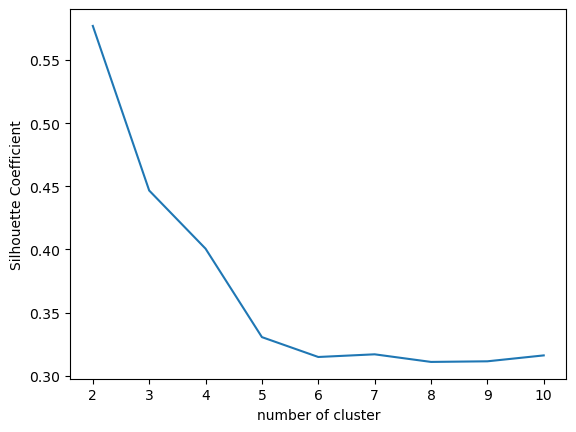

In [48]:
#plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients1)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

# DBSCAN Clustering

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [50]:
X,y= make_moons(n_samples=250,noise=0.05)

In [51]:
X

array([[ 9.46482447e-01,  2.12741951e-01],
       [ 1.05402911e-01,  1.04893965e+00],
       [ 1.99623612e+00,  2.56447425e-01],
       [ 1.75098781e-01, -6.13193627e-02],
       [ 1.35965574e+00, -4.37360269e-01],
       [ 4.32064474e-01, -2.77807441e-01],
       [ 8.65595270e-01,  4.55090667e-01],
       [ 1.07983950e+00, -4.73240581e-01],
       [ 4.97849763e-01, -3.46828394e-01],
       [ 5.80812651e-01,  8.43930790e-01],
       [ 6.63763622e-01,  6.93385492e-01],
       [ 1.45481591e+00, -3.40191832e-01],
       [-6.59880192e-02,  9.20633693e-01],
       [ 8.99485312e-01,  2.82350008e-01],
       [ 4.10097277e-01,  9.31828980e-01],
       [ 1.59678929e+00, -2.65737634e-01],
       [-8.94576162e-01,  2.50605834e-01],
       [ 4.34594630e-01, -2.63350520e-01],
       [ 2.36142998e-01, -7.78376082e-02],
       [ 1.14924399e+00, -4.35203708e-01],
       [-2.12947119e-01,  1.01325135e+00],
       [-7.44856977e-01,  6.55533259e-01],
       [ 1.72237703e+00, -2.28173156e-01],
       [ 9.

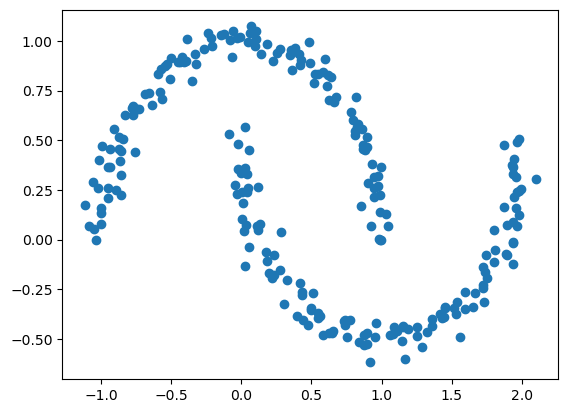

In [52]:
plt.scatter(X[:,0],X[:,1])

In [53]:
X_scaled_db = scaler.fit_transform(X)

In [54]:
#dbscan algo
dbscan = DBSCAN(eps = 0.5)

In [55]:
dbscan.fit(X_scaled_db)

DBSCAN()

In [56]:
dbscan.labels_

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

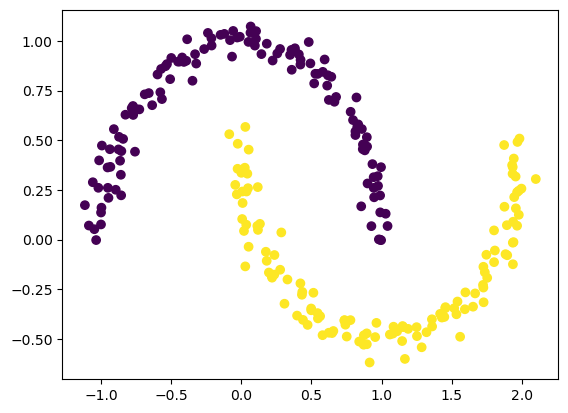

In [57]:
plt.scatter(X[:,0],X[:,1],c = dbscan.labels_)

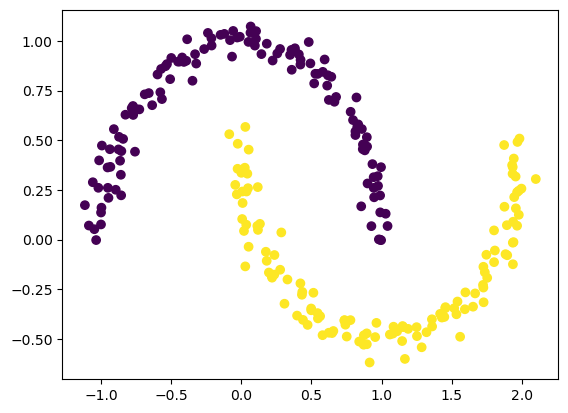

In [58]:
plt.scatter(X[:,0],X[:,1],c=y)